## Exploring read depth

**20170403**

I'd like to write a script that produces plots of read depth, in multiple ways (e.g., within and across individuals), but I realize that there were a couple of bugs in my previous notebook about this. So, trying to rewrite and debug here.

In [1]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder

/mnt/hgfs/SHARED_FOLDER/WorkingFolder


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [ ]:
# use this line to make the input file, a text file with each matches file on its own line
# first have to navigate to directory that contains all your matches files
!printf "%s\n" *.matches.tsv > list_matches_filenames.txt

In [3]:
# get file names from matches list text file
file_of_filenames = open("Stacks_2/list_matches_filenames.txt","r") # change to args.matchfiles
lines = file_of_filenames.readlines()
filename_list = []
for line in lines:
    filename = line.strip()
    filename_list.append(filename)
num_files = len(filename_list) # get num files

In [4]:
# initiate dictionary to store tag read depth information across individuals
tag_rd_cum_dict = {}

# initiate dictionary to store tag read depths, to quantify variance across individuals
tag_rd_for_vars = {}

# initiate list to store tag read depth within individuals
within_inds_tag_rd = []

In [5]:
# get within individual count data by building a temporary dictionary and merging lists

within_ints_rag_rd = []
for file in filename_list:
    indfile = open("Stacks_2" + "/" + file,"r") # change to args.
    lines = indfile.readlines()[1:]
    within_dict = {}
    for line in lines:
        linelist = line.strip().split()
        locus = int(linelist[2])
        count = int(linelist[6])
        if locus not in  within_dict:
            within_dict[locus] = int(count)
        elif locus in within_dict:
            oldcount =  within_dict[locus]
            newcount = oldcount + count
            within_dict[locus] = newcount     
        else:
            print "Something funky is going on."
        counts = within_dict.values()
        length = len(counts)
        sample = list(np.random.choice(counts, size=(length/100),replace=False))
        within_ints_rag_rd += sample
    indfile.close()



I got a memory error when trying to make a list of all individual read counts, so I'm randomly sampling 1/100 of them, and still have a huge list, with huge representation... but just so it's clear! The plot below will be of a randomly selected 1/100 of the individual read count data.

In [6]:
print within_ints_rag_rd[0:19]

[106, 68, 108, 100, 46, 41, 117, 71, 68, 87, 95, 100, 218, 87, 111, 205, 188, 213, 129]


In [7]:
# get tag read depths up to 99th percentile, to exclude most of tail that makes the plot unreadable
p = np.percentile(within_ints_rag_rd,99)
within_ints_rag_rd_99 = []
for rd in within_ints_rag_rd:
    if rd < p:
        within_ints_rag_rd_99.append(rd)
print within_ints_rag_rd_99[0:9]

[106, 68, 108, 100, 46, 41, 117, 71, 68]


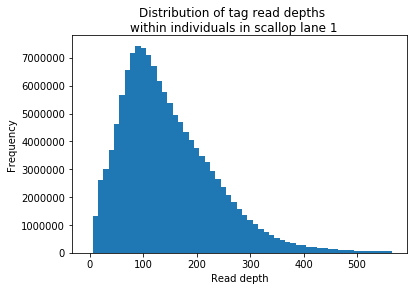

In [8]:
# plot histogram of within individual tag read depths, using 99 percentile
plt.hist(within_ints_rag_rd_99, bins = np.arange(0,max(within_ints_rag_rd_99)+1,10)-5)
plt.xlabel("Read depth")
plt.ylabel("Frequency")
plt.suptitle("Distribution of tag read depths \nwithin individuals in scallop lane 1")
plt.show()

If I wanted to defend that I trust my read depth, I could estimate probability of missing an allele at a given locus given the read depth distribution. I don't think it's necessary, but maybe later if I have a few minutes it could be interesting to measure.